# Загрузка библиотек

In [1]:
import hashlib
import imagehash
import pandas as pd
from PIL import Image
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Обнаружение дубликатов в датасете

In [3]:
hash_size = 8
def phash(image: Image.Image, hash_size: int) -> str:
    return str(
        hashlib.sha256(
            bytearray(
                imagehash.phash(
                    image, hash_size=hash_size
                ).hash.flatten().astype(int).tolist())
            ).hexdigest())

In [4]:
df_data = pd.read_pickle('../data/common_files/df_markup.pkl')
df_data.shape

(23281, 9)

In [5]:
hashes = []
duplicate_column = [0]
for file in tqdm(df_data['file_name']):
    file_hash = phash(Image.open(file), hash_size)
    hashes.append(file_hash)

100%|██████████| 23281/23281 [08:43<00:00, 44.47it/s] 


In [6]:
df_data['hash'] = hashes
counter = Counter(df_data['hash'])
df_hashes = pd.DataFrame(
    {
        'hash': list(counter.keys()),
        'count': list(counter.values())
    }
)
n_dupl = df_hashes[df_hashes['count']>1]['count'].sum()
print(f'Количество фото с дубликатами: {n_dupl}')

Количество фото с дубликатами: 4838


In [7]:
df_temp_duplicate = df_hashes[
    df_hashes['count']>1
].iloc[:3]
duplicated_images = df_data.loc[
    df_data['hash'].isin(df_temp_duplicate['hash'])
]['file_name'].values

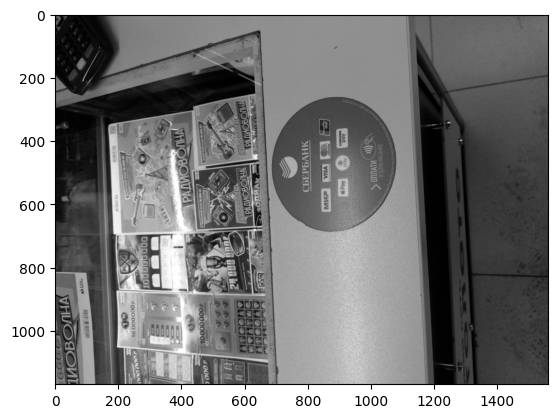

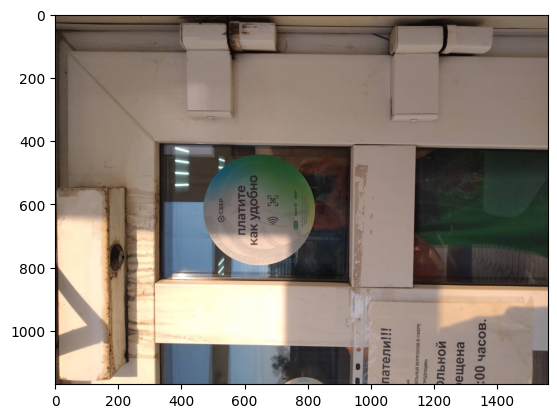

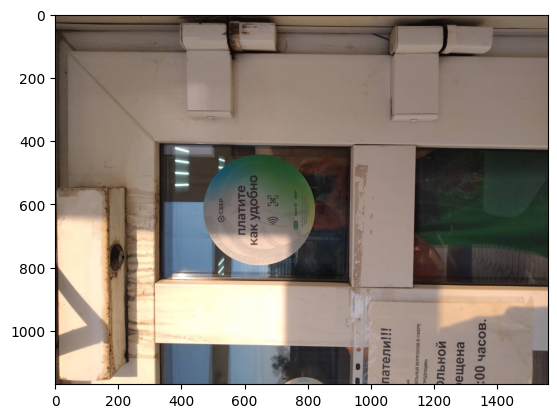

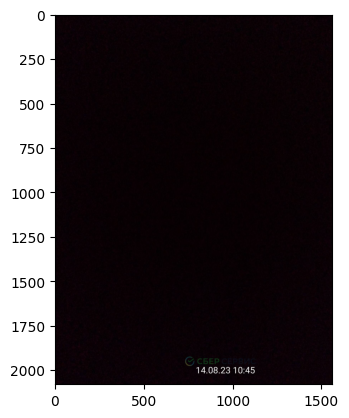

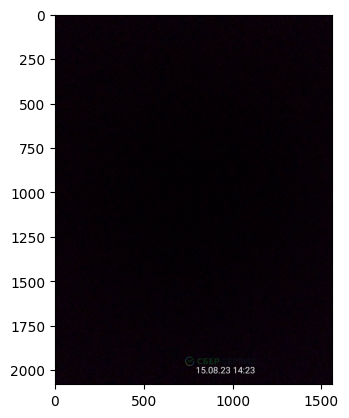

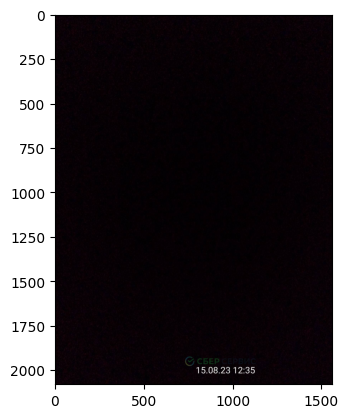

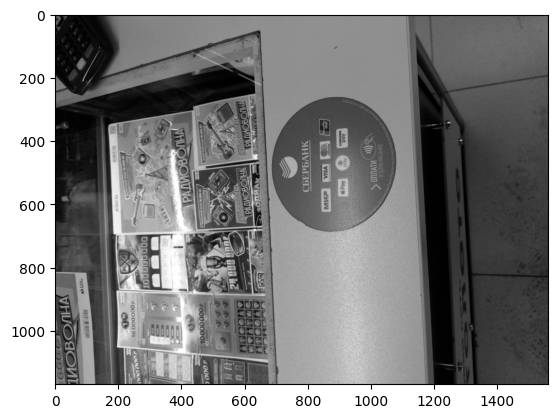

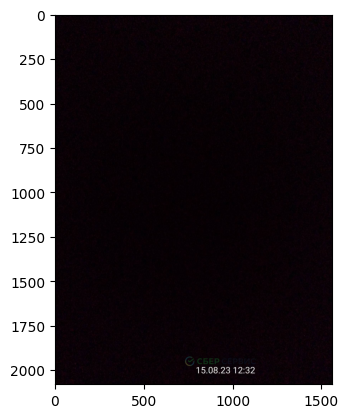

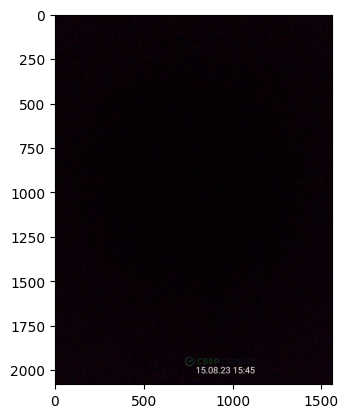

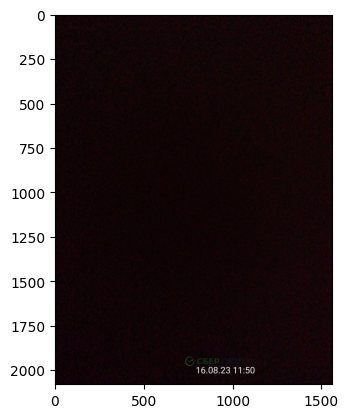

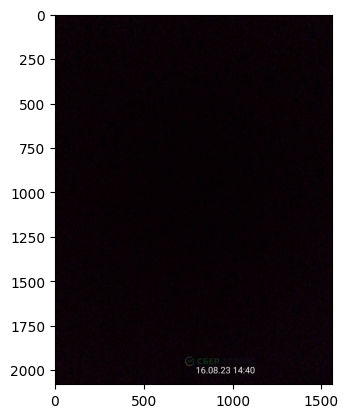

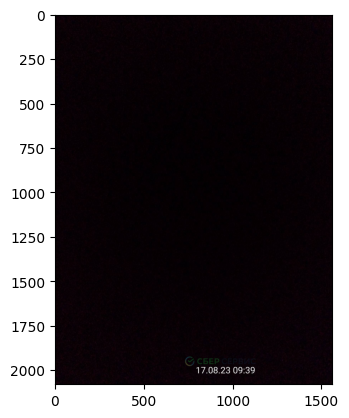

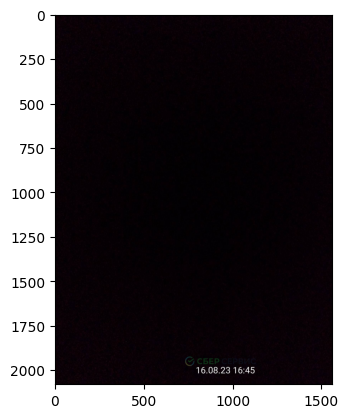

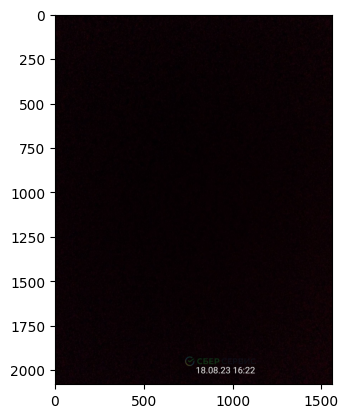

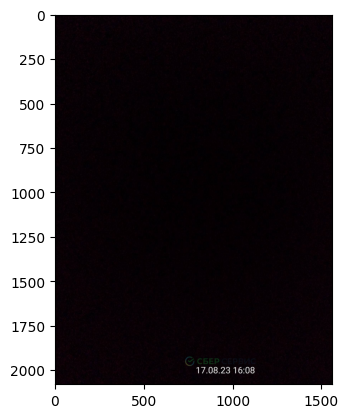

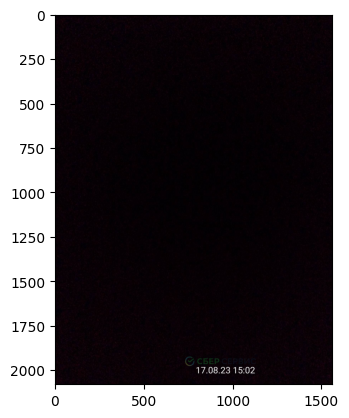

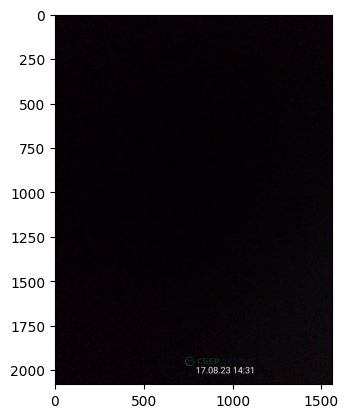

In [8]:
# duplicate photos examples
for image in duplicated_images:
    im = Image.open(image)
    plt.imshow(im)
    plt.show()

In [9]:
df_data.drop_duplicates(subset=['hash'], inplace=True)
df_data.reset_index(inplace=True, drop=True)
df_data.to_pickle('../data/common_files/df_markup.pkl')